In [11]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re

In [2]:
files_pos = os.listdir('train/pos')
files_pos = [open('train/pos/'+f, 'r').read() for f in files_pos]
files_neg = os.listdir('train/neg')
files_neg = [open('train/neg/'+f, 'r').read() for f in files_neg]


In [116]:
len(files_neg)

12500

### Preprocessing

In [100]:
all_words = []
documents = []

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('english')))

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for p in  files_pos:
    
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "pos") )
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    pos = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

    
for p in files_neg:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "neg") )
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    neg = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())


In [117]:
len(all_words)

29739

In [118]:
pos_A = []
for w in pos:
    if w[1][0] in allowed_word_types:
        pos_A.append(w[0].lower())
pos_N = []
for w in neg:
    if w[1][0] in allowed_word_types:
        pos_N.append(w[0].lower())

In [119]:
len(pos_N)

3

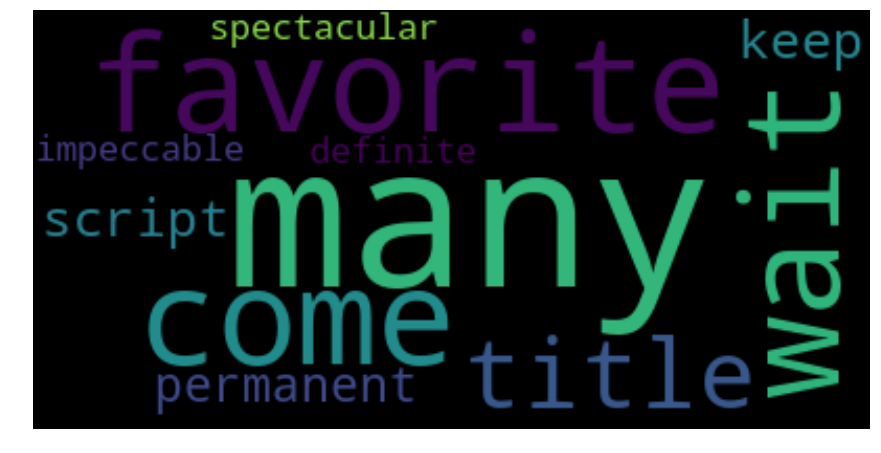

In [105]:
from wordcloud import WordCloud
text = ' '.join(pos_A)
wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(pos)

In [ ]:
# pickling the list documents to save future recalculations 

save_documents = open("pickled_algos/documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


In [109]:
# creating a frequency distribution of each adjectives. 
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 13703, 'bad': 8461, 'great': 8297, 'many': 6504, 'much': 6283, 'little': 5648, 'best': 4931, 'first': 4668, 'real': 4360, 'old': 3832, ...})

In [20]:
# # listing the 5000 most frequent words
# word_features = list(all_words.keys())[:5000]
word_features[0], word_features[-1]

('respect', 'reused')

In [ ]:
save_word_features = open("pickled_algos/word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()


In [13]:
# function to create a dictionary of features for each review in the list document.
# The keys are the words in word_features 
# The values of each key are either true or false for wether that feature appears in the review or not
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

# Creating features for each review
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Shuffling the documents 
random.shuffle(featuresets)
print(len(featuresets))

25000


In [26]:
training_set = featuresets[:20000]
testing_set = featuresets[20000:]
print( 'training_set :', len(training_set), '\ntesting_set :', len(testing_set))

training_set : 20000 
testing_set : 5000


In [79]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

classifier.show_most_informative_features(15)

Classifier accuracy percent: 84.36
Most Informative Features
                  sleeve = True              neg : pos    =     15.8 : 1.0
                   lousy = True              neg : pos    =     13.0 : 1.0
           unpretentious = True              pos : neg    =     12.9 : 1.0
             influential = True              pos : neg    =     12.9 : 1.0
                 unfunny = True              neg : pos    =     12.6 : 1.0
                quotable = True              pos : neg    =     12.3 : 1.0
                 lighten = True              pos : neg    =     12.3 : 1.0
                   vapid = True              neg : pos    =     11.9 : 1.0
                 radiant = True              pos : neg    =     11.6 : 1.0
                 insipid = True              neg : pos    =     11.5 : 1.0
               pointless = True              neg : pos    =     11.3 : 1.0
                flawless = True              pos : neg    =     10.7 : 1.0
               laughable = True        

In [92]:
# Printing the most important features 

mif = classifier.most_informative_features()

mif = [a for a,b in mif]
print(mif)

['sleeve', 'lousy', 'unpretentious', 'influential', 'unfunny', 'quotable', 'lighten', 'vapid', 'radiant', 'insipid', 'pointless', 'flawless', 'laughable', 'someones', 'worst', 'atrocious', 'polar', 'horrid', 'haphazard', 'awful', 'extraneous', 'superlative', 'candid', 'indelible', 'blah', 'tenant', 'uninteresting', 'existent', 'lame', 'navy', 'fearless', 'denies', 'unintentional', 'unoriginal', 'fairytale', 'abysmal', 'masterful', 'offscreen', 'consent', 'delightful', 'incompetent', 'undercurrent', 'majesty', 'tumultuous', 'voluptuous', 'ephemeral', 'astonishing', 'tedious', 'idiotic', 'untrue', 'sumptuous', 'unlikeable', 'amateurish', 'unconvincing', 'delicious', 'quintessential', 'pitiful', 'sardonic', 'robust', 'sadness', 'nondescript', 'fiasco', 'chess', 'unforgiving', 'pioneering', 'banquet', 'slum', 'saucer', 'riotous', 'lackluster', 'monotonous', 'email', 'integral', 'pathetic', 'intolerable', 'timeless', 'unavailable', 'relaxed', 'comprehensive', 'semi', 'forgettable', 'wooden'

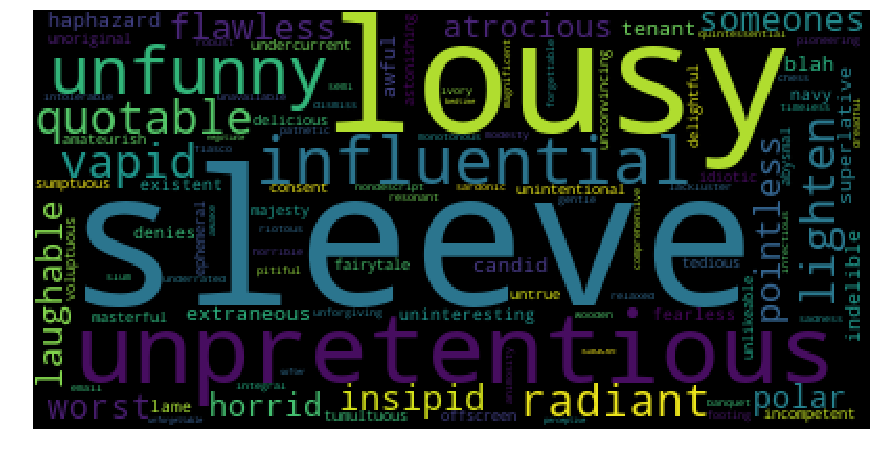

In [97]:
from wordcloud import WordCloud
text = ' '.join(mif)
wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= 'none')
plt.axis("off")
plt.show()

In [45]:
# getting predictions for the testing set by looping over each reviews featureset tuple
# The first elemnt of the tuple is the feature set and the second element is the label 
ground_truth = [r[1] for r in testing_set]

preds = [classifier.classify(r[0]) for r in testing_set]


In [75]:
from sklearn.metrics import f1_score
f1_score(ground_truth, preds, labels = ['neg', 'pos'], average = 'micro')

0.8436

In [162]:
vars(classifier).keys()

dict_keys(['_label_probdist', '_feature_probdist', '_labels', '_most_informative_features'])

Confusion matrix, without normalization
[[2155  374]
 [ 408 2063]]
Normalized confusion matrix
[[0.85 0.15]
 [0.17 0.83]]


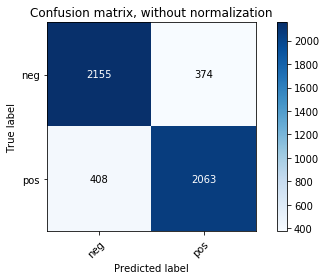

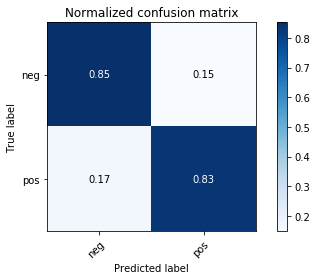

In [193]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_test = ground_truth
y_pred = preds
class_names = ['neg', 'pos']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [180]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[2155  374]
 [ 408 2063]]


In [189]:
np.arange(cm.shape[1])

array([0, 1])

In [174]:
print(408+2063, 2155+374)
y_test.count('pos'), y_test.count('neg')

2471 2529


(2471, 2529)

In [173]:
print(2155+408, 2063+374)
y_pred.count('pos'), y_pred.count('neg')

2563 2437


(2437, 2563)

In [117]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

Classifiers for an ensemble model: 
Naive Bayes (NB)
Multinomial NB
Bernoulli NB
Logistic Regression
Stochastic Gradient Descent Classifier - SGD
Support Vector Classification - SVC


In [120]:
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, testing_set))*100)

BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, testing_set))*100)

LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, testing_set))*100)

SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, testing_set))*100)

SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, testing_set))*100)


Original Naive Bayes Algo accuracy percent: 84.36
Most Informative Features
                  sleeve = True              neg : pos    =     15.8 : 1.0
                   lousy = True              neg : pos    =     13.0 : 1.0
           unpretentious = True              pos : neg    =     12.9 : 1.0
             influential = True              pos : neg    =     12.9 : 1.0
                 unfunny = True              neg : pos    =     12.6 : 1.0
                quotable = True              pos : neg    =     12.3 : 1.0
                 lighten = True              pos : neg    =     12.3 : 1.0
                   vapid = True              neg : pos    =     11.9 : 1.0
                 radiant = True              pos : neg    =     11.6 : 1.0
                 insipid = True              neg : pos    =     11.5 : 1.0
               pointless = True              neg : pos    =     11.3 : 1.0
                flawless = True              pos : neg    =     10.7 : 1.0
               laughable

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression_classifier accuracy percent: 83.5


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier_classifier accuracy percent: 80.24


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC_classifier accuracy percent: 78.08


### Storing all models using pickle 

In [206]:
def create_pickle(c, file_name): 
    save_classifier = open(file_name, 'wb')
    pickle.dump(c, save_classifier)
    save_classifier.close()

classifiers_dict = {'ONB': [classifier, 'pickled_algos/ONB_clf.pickle'],
                    'MNB': [MNB_clf, 'pickled_algos/MNB_clf.pickle'],
                    'BNB': [BNB_clf, 'pickled_algos/BNB_clf.pickle'],
                    'LogReg': [LogReg_clf, 'pickled_algos/LogReg_clf.pickle'],
                    'SGD': [SGD_clf, 'pickled_algos/SGD_clf.pickle'], 
                    'SVC': [SVC_clf, 'pickled_algos/SVC_clf.pickle']}




for clf, listy in classifiers_dict.items(): 
    create_pickle(listy[0], listy[1])

In [124]:
testing_set[0]

({'respect': False,
  'sure': False,
  'memorable': False,
  'famous': False,
  'unstable': False,
  'pal': False,
  'priest': False,
  'top': False,
  'wicked': False,
  'diabolical': False,
  'great': False,
  'full': False,
  'solid': False,
  'unremarkable': False,
  'wonderful': False,
  'favorite': False,
  'strange': False,
  'feeling': False,
  'new': False,
  'fifth': False,
  'popular': False,
  'prospect': False,
  'giantbr': False,
  'freckled': False,
  'kill': False,
  'evil': False,
  'handful': False,
  'cool': False,
  'eat': False,
  'hot': False,
  'sandwich': False,
  'exotic': False,
  'organismbr': False,
  'youve': False,
  'dick': False,
  'vomitous': False,
  'dark': False,
  'secret': False,
  'ultrasensitive': False,
  'hyperbolize': False,
  'proxy': False,
  'valuable': False,
  'unity': False,
  'global': False,
  'looked': False,
  'lawful': False,
  'additional': False,
  'incredible': False,
  'natural': False,
  'sad': False,
  'perfect': False,
  'com

In [131]:
from sklearn.metrics import f1_score, accuracy_score
ground_truth = [r[1] for r in testing_set]
predictions = {}
f1_scores = {}
for clf, listy in classifiers_dict.items(): 
    # getting predictions for the testing set by looping over each reviews featureset tuple
    # The first elemnt of the tuple is the feature set and the second element is the label 
    predictions[clf] = [listy[0].classify(r[0]) for r in testing_set]
    f1_scores[clf] = f1_score(ground_truth, predictions[clf], labels = ['neg', 'pos'], average = 'micro')
    print(f'f1_score {clf}: {f1_scores[clf]}')

f1_score MNB: 0.845
f1_score BNB: 0.8447999999999999
f1_score LogReg: 0.835
f1_score SGD: 0.8024
f1_score SVC: 0.7808


In [132]:
acc_scores = {}
for clf, listy in classifiers_dict.items(): 
    # getting predictions for the testing set by looping over each reviews featureset tuple
    # The first elemnt of the tuple is the feature set and the second element is the label 
    acc_scores[clf] = accuracy_score(ground_truth, predictions[clf])
    print(f'Accuracy_score {clf}: {acc_scores[clf]}')

Accuracy_score MNB: 0.845
Accuracy_score BNB: 0.8448
Accuracy_score LogReg: 0.835
Accuracy_score SGD: 0.8024
Accuracy_score SVC: 0.7808


# Ensemble Model

In [196]:
from nltk.classify import ClassifierI

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    # a simple measurement the degree of confidence in the classification 
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf


#### Loading all models using pickle

In [209]:
# Load all classifiers from the pickled files 

# function to load models given filepath
def load_model(file_path): 
    classifier_f = open(file_path, "rb")
    classifier = pickle.load(classifier_f)
    classifier_f.close()
    return classifier


# Original Naive Bayes Classifier
ONB_Clf = load_model('pickled_algos/ONB_clf.pickle')

# Multinomial Naive Bayes Classifier 
MNB_Clf = load_model('pickled_algos/MNB_clf.pickle')


# Bernoulli  Naive Bayes Classifier 
BNB_Clf = load_model('pickled_algos/BNB_clf.pickle')

# Logistic Regression Classifier 
LogReg_Clf = load_model('pickled_algos/LogReg_clf.pickle')

# Stochastic Gradient Descent Classifier
SGD_Clf = load_model('pickled_algos/SGD_clf.pickle')



In [222]:
ensemble_clf = EnsembleClassifier(ONB_Clf, MNB_Clf, BNB_Clf, LogReg_Clf, SGD_Clf)


In [221]:
type(ONB_Clf._label_probdist)

nltk.probability.ELEProbDist

In [ ]:
def sentiment(text):
    feats = find_features(text)
    return ensemble_clf.classify(feats), ensemble_clf.confidence(feats)

In [223]:
feature_list = [f[0] for f in testing_set]
ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]

In [224]:
f1_score(ground_truth, ensemble_preds, average = 'micro')

0.8459999999999999

In [ ]:
ensemble

In [225]:
# Function to do classification a given review and return the label a
# and the amount of confidence in the classifications
def sentiment(text):
    feats = find_features(text)
    return ensemble_clf.classify(feats), ensemble_clf.confidence(feats)

('pos', 0.6)

In [229]:
# sentiment analysis of reviews of captain marvel found on rotten tomatoes
text_a = '''The problem is with the corporate anticulture that controls these productions-and 
            the fandom-targeted demagogy that they're made to fulfill-which responsible casting 
                can't overcome alone.'''
text_b = '''Does it work? The short answer is: yes. There's enough to keep both diehard 
                Marvel fans and newcomers engaged.'''
text_c = '''It was lacking, a bit flat, and I'm honestly concerned about how she will enter
            the Marvel Cinematic Universe...it's so concerned with being a feminist film that 
            it forgets how to be a superhero movie.'''
text_d = '''The film may be about women breaking their shackles, but the lead actress feels kept 
            in check for much of the picture. Humor winds up being provided by Samuel Jackson's Nick 
            Fury, heart by Lashana Lynch's Maria Rambeau, and pathos by...well, it ain't Larson'''
text_e = '''"Everything was beautiful and nothing hurt"'''

sentiment(text_a), sentiment(text_b), sentiment(text_c), sentiment(text_d), sentiment(text_e)

(('pos', 0.6), ('neg', 0.8), ('neg', 0.6), ('neg', 1.0), ('pos', 1.0))

#### Random Forest

In [265]:
# converting the training set  into a pandas data frame

from tqdm import tqdm_notebook as tqdm
import time
import pandas as pd 
df = pd.DataFrame([training_set[0][0]])
for f in tqdm(training_set[1:]): 
    df = df.append([f[0]], ignore_index=True)

In [ ]:
# converting the testing set  into a pandas data frame
df_test = pd.DataFrame([testing_set[0][0]])
for f in tqdm(testing_set[1:]): 
    df_test = df_test.append([f[0]], ignore_index=True)

In [268]:
df.tail()

,abandoningbr,abandonment,able,abnormal,aboutbr,abr,abrupt,absent,absolute,abstract,...,youve,zany,zealous,zen,zenith,zest,zombi,zombie,zooey,zooms
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [283]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state=0)
X = df
y = [x[1] for x in training_set]


In [284]:
clf.fit(X, y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [285]:
clf.score(X, y)

0.85385

In [279]:
clf.decision_path(X)

(<20000x25282 sparse matrix of type '<class 'numpy.int64'>'
 	with 21938922 stored elements in Compressed Sparse Row format>,
 array([    0,   303,   526,   699,   902,  1155,  1464,  1669,  1858,
         2067,  2312,  2519,  2856,  3111,  3406,  3695,  3962,  4167,
         4502,  4761,  5050,  5291,  5550,  5793,  6064,  6285,  6506,
         6823,  7118,  7307,  7614,  7875,  8140,  8369,  8586,  8883,
         9102,  9419,  9648,  9999, 10244, 10563, 10728, 10959, 11152,
        11317, 11540, 11771, 11952, 12253, 12506, 12723, 12936, 13171,
        13454, 13663, 13924, 14121, 14434, 14673, 14922, 15131, 15406,
        15619, 15834, 16085, 16418, 16697, 16872, 17185, 17428, 17707,
        18056, 18271, 18548, 18785, 19016, 19265, 19456, 19757, 20038,
        20309, 20542, 20829, 21110, 21381, 21672, 21923, 22176, 22365,
        22682, 22907, 23092, 23387, 23660, 23985, 24292, 24517, 24776,
        25039, 25282]))